In [2]:
import scipy.io as sio
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import clear_output
from scipy.optimize import fmin_tnc
import time
from scipy.optimize import minimize,fmin_tnc

### Cost Function with regularization

![Alt text](static/img/logic_reg_const_func_with_regularization.png )

### The partial derivative with regularization

![Alt text](static/img/derivative_cost_func.png )

In [3]:
def get_accuracy(y_predicted, y_actual):
    return np.sum(y_predicted == y_actual) / y_actual.shape[0] 

In [4]:
class MultiClassLogisticRegression():
    def __init__(self, classes, regularize = True ,α = 0.00001):
        self.classes = classes
        self.regularize = regularize
        self.α = α
        self.parameters = {}

    def fit(self, X, y, θ):
        for c in self.classes:
            opt_weights = fmin_tnc(func=self.cost_fn, x0=θ, 
                                   fprime=self.gradient, 
                                   args=(X, (y == c).astype('int').flatten()))
            self.parameters[c] = opt_weights[0]
        return self.parameters
    
    def sigmoid(self, θ, X):
        z = X @ θ
        return  1 / (1 + np.exp(-z))
    
    def cost_fn(self, θ, X, y):
        m = X.shape[0]
        h = self.sigmoid(θ, X)
        y_equel_1 = np.transpose(-y) @ np.log(h)
        y_equel_0 = np.transpose((1 - y)) @ np.log(1 - h)
        if self.regularize == True:   
            regularization = (self.α / 2 * m) * (θ[1:] ** 2).sum()
        else: 
            regularization = 0
        return  (1 / m) * (y_equel_1 - y_equel_0) + regularization

    def gradient(self, θ, X, y):
        m = X.shape[0]
        
        g = self.sigmoid(θ, X)
        gred = np.array(θ.shape)
        if self.regularize == True:   
            regularization = (self.α / 2 * m) * θ
            regularization = regularization.reshape(θ.shape)
        else: 
            regularization = 0
        return np.append(
            [( 1 / m ) * (g - y).sum()], 
            (( 1 / m ) * np.transpose(X) @ (g - y) + regularization)[1:], 
            axis=0)
    
    def predict(self, X):
        if (len(self.parameters) != 0):
            y_predicted  = np.empty((X.shape[0], 0))
            for c in self.classes:
                h = self.sigmoid(self.parameters[c], X)
                y_predicted = np.append(y_predicted, h.reshape([h.shape[0], 1]),  axis=1)
            predicted_class = np.argwhere(y_predicted == np.amax(y_predicted,1, keepdims=True))[:, 1:] 
            y_predicted = np.append(y_predicted, predicted_class.reshape([predicted_class.shape[0], 1]),  axis=1)
            return y_predicted
        else:
            raise Exception("Fit the model first!")

## Recognition hand-written digits 

In [5]:
raw = sio.loadmat('static/datasets/handwritten-numbers/ex3data1.mat')

In [6]:
data = np.concatenate((raw['X'], raw['y']), axis=1)
np.random.shuffle(data)
X = data[:, :-1]
X = np.concatenate((np.ones((X.shape[0], 1)), X), axis=1) 
y = data[:, [-1]] - 1

In [7]:
train_set_count = int(X.shape[0] * .75)

train_X, test_X = np.split(X, [int(X.shape[0] * .75)])
train_y, test_y = np.split(y, [int(y.shape[0] * .75)])
θ = np.zeros([X.shape[1], 1])

In [8]:
model = MultiClassLogisticRegression(list(range(0, 10)))
params = model.fit(train_X, train_y, θ)

In [9]:
prediction = model.predict(train_X)
print(f"Accuracy on training data: {get_accuracy(prediction[:, [-1]], train_y)}")

Accuracy on training data: 0.8904


In [10]:
prediction = model.predict(test_X)
print(f"Accuracy on testing data: {get_accuracy(prediction[:, [-1]], test_y)}")

Accuracy on testing data: 0.8616


In [ ]:
np.set_printoptions(suppress=True)
for i in range(0, 10):
    clear_output(wait=True)
    plt.gray()
    plt.imshow(test_X[i, 1:].reshape(20, 20))
    print(np.round(prediction[i], 4))
    print(prediction[i, -1] + 1)
    plt.show()
    time.sleep(3)

### Something simular to NN

In [12]:
theta = sio.loadmat('static/datasets/handwritten-numbers/ex3weights.mat')

In [13]:
def sigmoid(X, θ):
    z = X @ θ
    return  1 / (1 + np.exp(-z))

In [14]:
theta1 = np.array(theta['Theta1'])
theta2 = np.array(theta['Theta2'])

In [15]:
layers = 3
layer2_units = 20
output_layer_units = 10
# hidden layer
alpha = np.empty((X.shape[0], 0))
for unit_theta1 in theta1:
    a = unit_theta1.reshape([unit_theta1.shape[0], 1])
    h = sigmoid(X, a)
    alpha = np.append(alpha, h.reshape([h.shape[0], 1]),  axis=1)
alpha = np.concatenate((np.ones((alpha.shape[0], 1)), alpha), axis=1)

params = np.empty((alpha.shape[0], 0))
for unit_theta2 in theta2:
    a = unit_theta2.reshape([unit_theta2.shape[0], 1])
    h = sigmoid(alpha, a)
    params = np.append(params, h.reshape([h.shape[0], 1]),  axis=1)
params.shape


(5000, 10)

[0.00655945 0.0855337  0.99127769 0.00002112 0.00088302 0.00002132
 0.00019479 0.00031359 0.00161023 0.00305298]
[3.]


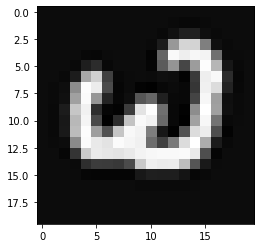

In [16]:
i = 10
print(params[i])
print(y[i] + 1)
plt.gray()
plt.imshow(X[i, 1:].reshape(20, 20))

In [17]:
theta1[1].reshape([theta1.shape[1], 1]).shape

(401, 1)